In [10]:
import os
import re
from datetime import datetime
import seaborn as sns 
import matplotlib.pyplot as plt 
import nltk
import pandas as pd
from git import Repo
from textblob import TextBlob

nltk.download("averaaged_perceptron_tagger")

def analyze_mood(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    if sentiment.polarity > 0:
        return "Positive"
    elif sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

def clean_message(message):
    message = re.sub(r"\W+", " ", message.lower()).strip()
    message = re.sub(r"git|github|commit|pull|request", " ", message.lower()).strip()
    return message

[nltk_data] Error loading averaaged_perceptron_tagger: Package
[nltk_data]     'averaaged_perceptron_tagger' not found in index


In [11]:
repo_dir = "./pd"

try:
    os.rmdir(repo_dir)
except:
    pass

pd_repo = Repo.clone_from("https://github.com/pandas-dev/pandas.git", repo_dir)

In [13]:
commits = list(pd_repo.iter_commits("main"))
# commit_messages = [commit.message for commit in commits]
commit_details = [
    (
        commit.authored_date,
        commit.author.email.lower(),
        clean_message(commit.message.replace("\n", " ")),
    )
    for commit in commits
]

In [14]:
df = pd.DataFrame(commit_details)

In [15]:
df.columns = ("authored_date", "email", "msg")

In [16]:
df["authored_date"] = pd.to_datetime(df["authored_date"], unit="s")

In [17]:
df[["polarity", "sentiment"]] = (
    df["msg"].apply(lambda x: TextBlob(x).sentiment).apply(pd.Series)
)

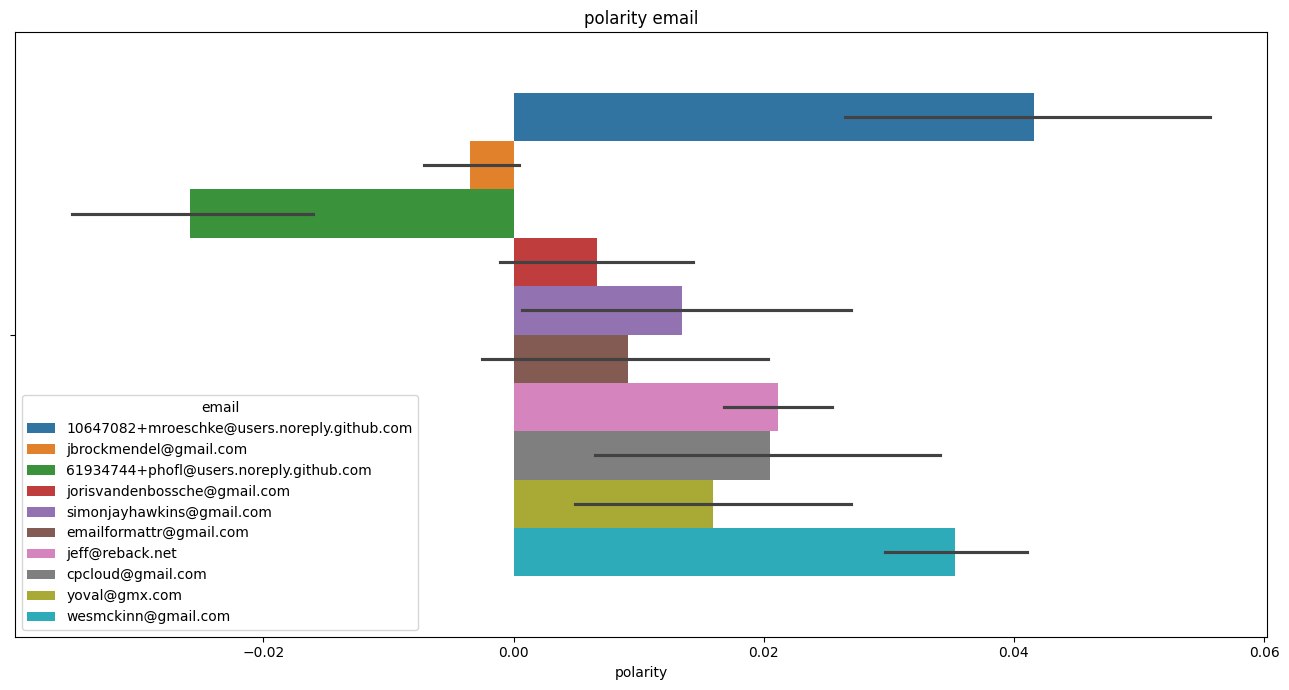

In [23]:
fig,ax=plt.subplots(1, figsize=(13,7))
sns.barplot(data=df[df['email'].isin(df['email'].value_counts()[:10].index)], x='polarity',hue='email').set(title='polarity email')
plt.tight_layout()